In [2]:
# !pip install pyLDAvis

# Dataset

In [3]:
# Importing libraries for data preparation and visualization
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# # Importing warnings to ignore them
# import warnings
# warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

In [25]:
df = pd.read_csv("X_train_stemm_cleaned.csv")

In [26]:
y_train = pd.read_csv("y_train.csv")

In [ ]:
# df_all = pd.read_csv("tweet.csv", index_col=0)
# # Separate the features (X) and the target variable (y)
# X = df_all.drop(columns="sentimen")
# y = df_all["sentimen"]
# # Split the data into 70% training and 30% testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.3,
#                                                     stratify=y,
#                                                     random_state=123)
# # Split the training data into training and validation sets
# X_test, X_valid, y_test, y_valid = train_test_split(X_test,
#                                                     y_test,
#                                                     test_size=0.5,
#                                                     random_state=42,
#                                                     stratify=y_test)

In [27]:
df = pd.concat([df, y_train], axis=1)
# df = df.drop("level_0", axis=1)
# df["sentimen"] = y_train

In [28]:
df.shape

(1270, 12)

In [29]:
df.head()

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming,tweet_tokenize,sentimen
0,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini😭 Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",Pak liat ini pak Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,pak liat ini pak tolong digajih team yg bikin film dokumenter sekeren ini menangis keras bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,pak lihat ini pak tolong digajih team yang membuat film dokumenter sekeren ini menangis keras membuat menangis dan ngerasa bersalah sangat sering lupa pergi casan dan matiin lampu,lihat tolong digajih team film dokumenter sekeren menangis keras menangis ngerasa bersalah sangat lupa pergi casan matiin lampu,lihat tolong gajih team film dokumenter keren menang keras menang ngerasa salah sangat lupa pergi cas matiin lampu,"['lihat', 'tolong', 'gajih', 'team', 'film', 'dokumenter', 'keren', 'menang', 'keras', 'menang', 'ngerasa', 'salah', 'sangat', 'lupa', 'pergi', 'cas', 'matiin', 'lampu']",netral
1,"Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)","Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)","Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)",Scope berpikir Anda kecil sekali Yg pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya Pemain ML DOTA FF PUBG banyak sekali yg berbasis di Indo Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini 1,scope berpikir anda kecil sekali yg pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yg berbasis di indo pak jokowi mau tau apa tanggapan pak prabowo soal potensi dr ekonomi kreatif ini 1,scope berpikir kamu kecil sekali yang pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yang berbasis di indo pak jokowi mau tahu apa tanggapan pak prabowo soal potensi dari ekonomi kreatif ini 1,scope berpikir kamu kecil sekali yang pak jokowi mau tekankan bukan soal main gamenya tapi ekosistemnya pemain ml dota ff pubg banyak sekali yang berbasis di indo pak jokowi mau tahu apa tanggapan pak prabowo soal potensi dari

# EDA Viz

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop=set(stopwords.words('indonesian'))

## Statistics

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   tweet                         1270 non-null   object
 1   tweet_non_emoticon            1270 non-null   object
 2   tweet_non_url                 1270 non-null   object
 3   tweet_non_special_characters  1270 non-null   object
 4   tweet_lowercase               1270 non-null   object
 5   tweet_non_slang               1270 non-null   object
 6   tweet_non_numeric             1270 non-null   object
 7   tweet_non_double_space        1270 non-null   object
 8   tweet_non_stopwords           1270 non-null   object
 9   tweet_stemming                1270 non-null   object
 10  tweet_tokenize                1270 non-null   object
 11  sentimen                      1270 non-null   object
dtypes: object(12)
memory usage: 119.2+ KB


In [34]:
df.describe()

,tweet,tweet_non_emoticon,tweet_non_url,tweet_non_special_characters,tweet_lowercase,tweet_non_slang,tweet_non_numeric,tweet_non_double_space,tweet_non_stopwords,tweet_stemming,tweet_tokenize,sentimen
count,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270
unique,1270,1270,1270,1270,1270,1268,1268,1268,1261,1261,1261,3
top,"Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini😭 Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar https://youtu.be/qlB7vg4I-To Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((","Pak, liat ini pak. @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((",Pak liat ini pak Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,pak liat ini pak tolong digajih team yg bikin film dokumenter sekeren ini menangis keras bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu,prabowosandi janji tidak ambil gaji jika terpilih,prabowosandi janji tidak ambil gaji jika terpilih,prabowosandi janji tidak ambil gaji jika terpilih,wowo kesalahan arah ekonomi mengakibatkan deindustrialisasi salah presidenpresiden sebelum jokowi ekonomi indonesia jokowi baikbaik ngehoaks menyalahkan presiden prabowosalahkansby,wowo salah arah ekonomi akibat deindustrialisasi salah presidenpresiden belum jokowi ekonomi indonesia jokowi baikbaik ngehoaks salah presiden prabowosalahkansby,"['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presidenpresiden', 'belum', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'ngehoaks', 'salah', 'presiden', 'prabowosalahkansby']",positif
freq,1,1,1,1,1,2,2,2,3,3,3,428


Number of characters present in each sentence

<Axes: >

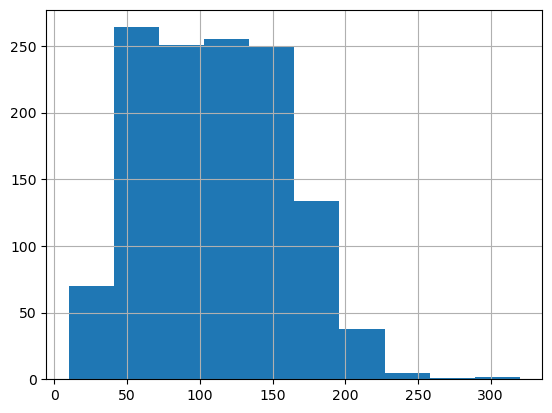

In [35]:
df['tweet_stemming'].str.len().hist()

Number of words appearing in each sentence.

<Axes: >

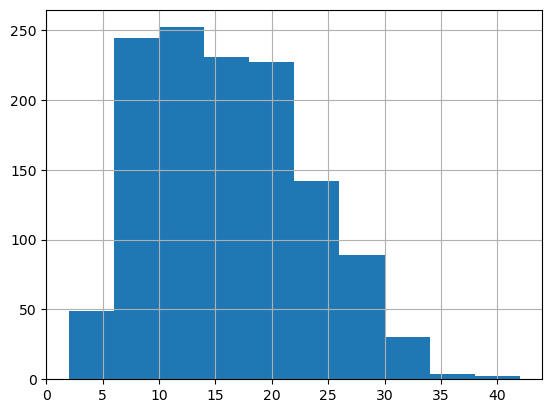

In [36]:
df['tweet_stemming'].dropna().str.split().map(lambda x: len(x)).hist()

Analysing word length

<Axes: >

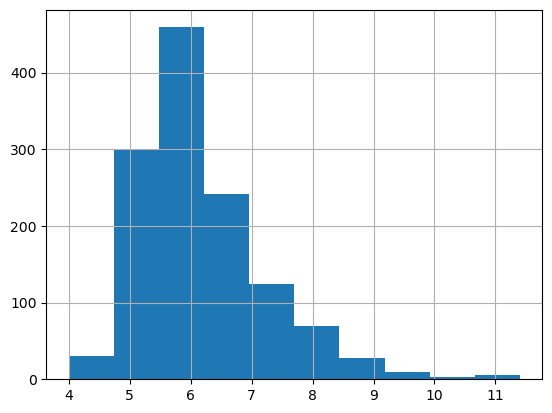

In [38]:
df['tweet_stemming'].dropna().str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

## Analysing stopwords

In [72]:
# Create corpus
corpus=[]
new= df['tweet_non_slang'].dropna().str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

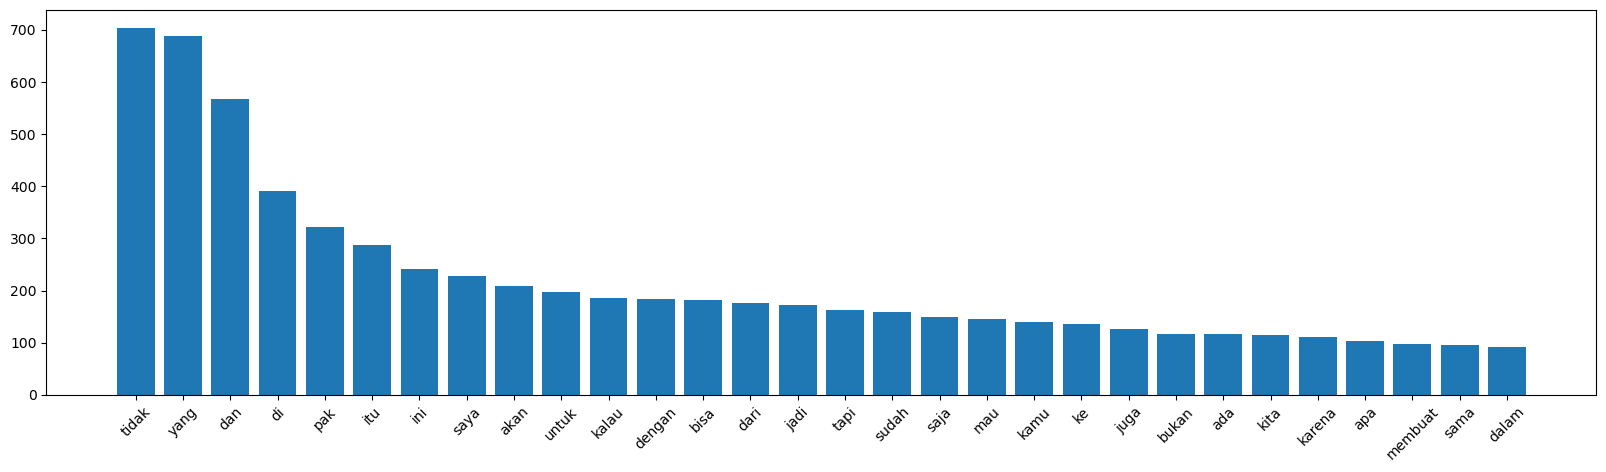

In [73]:
# Plot top stopwords

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30]
x,y=zip(*top)
fig = plt.figure(figsize=(20, 5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

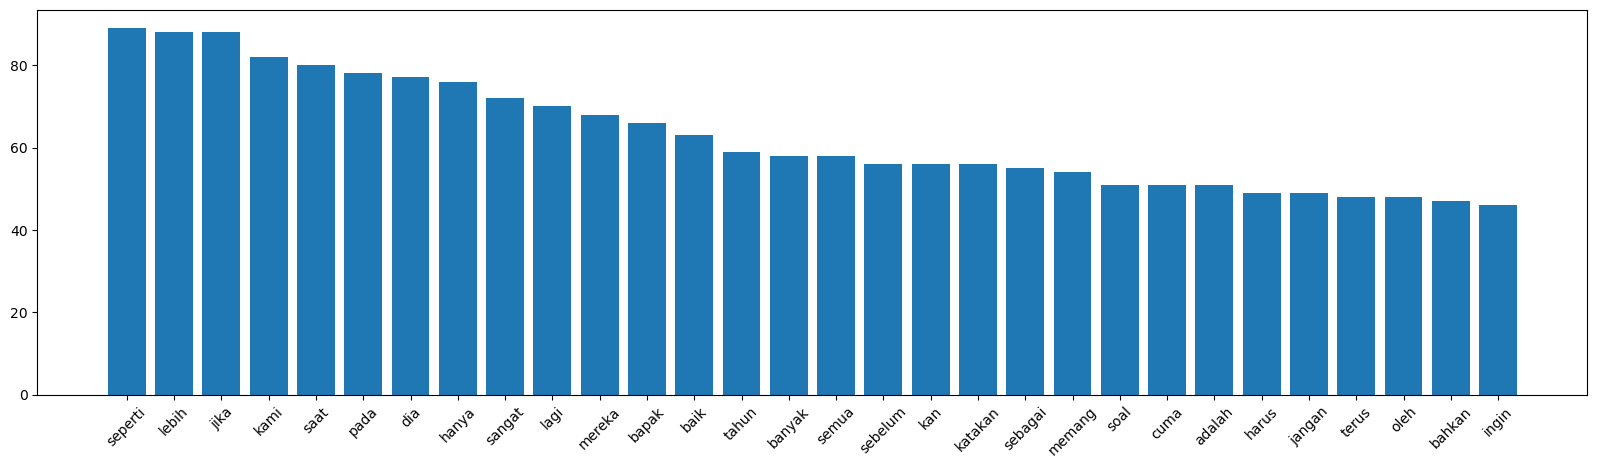

In [74]:
# Plot top stopwords

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[30:60]
x,y=zip(*top)
fig = plt.figure(figsize=(20, 5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

positif

In [79]:
# Create corpus
corpus=[]
new= df[df['sentimen'] == 'positif']['tweet_non_slang'].dropna().str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
positive_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        positive_dic[word]+=1

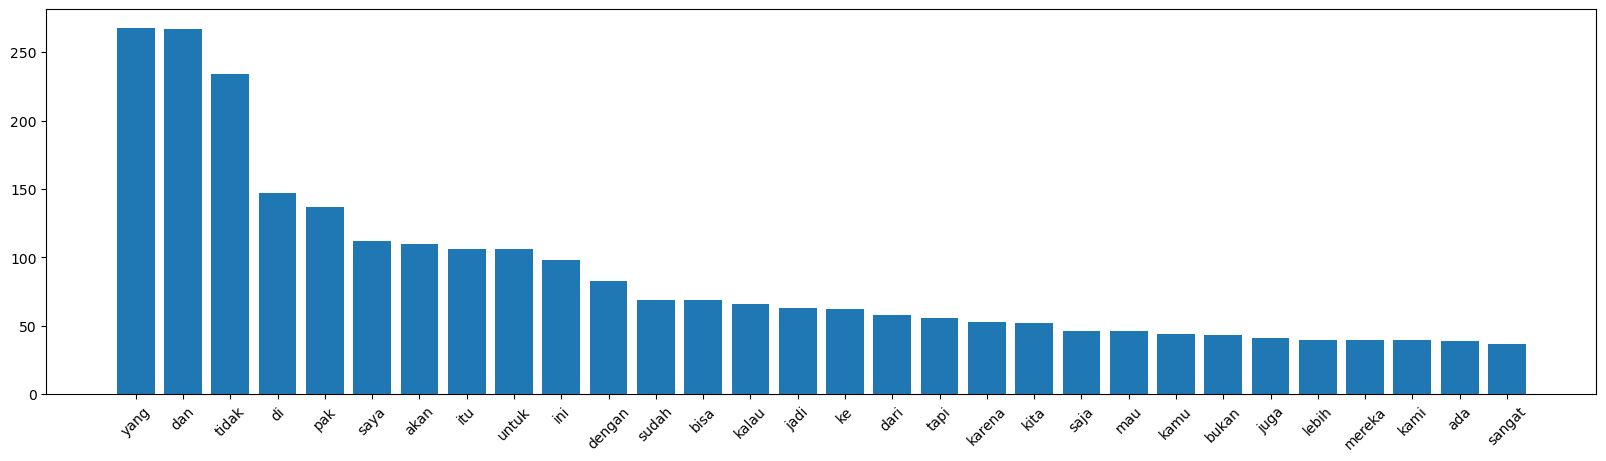

In [80]:
# Plot top stopwords

top=sorted(positive_dic.items(), key=lambda x:x[1],reverse=True)[:30]
x,y=zip(*top)
fig = plt.figure(figsize=(20, 5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

negatif

In [81]:
# Create corpus
corpus=[]
new= df[df['sentimen'] == 'negatif']['tweet_non_slang'].dropna().str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
negative_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        negative_dic[word]+=1

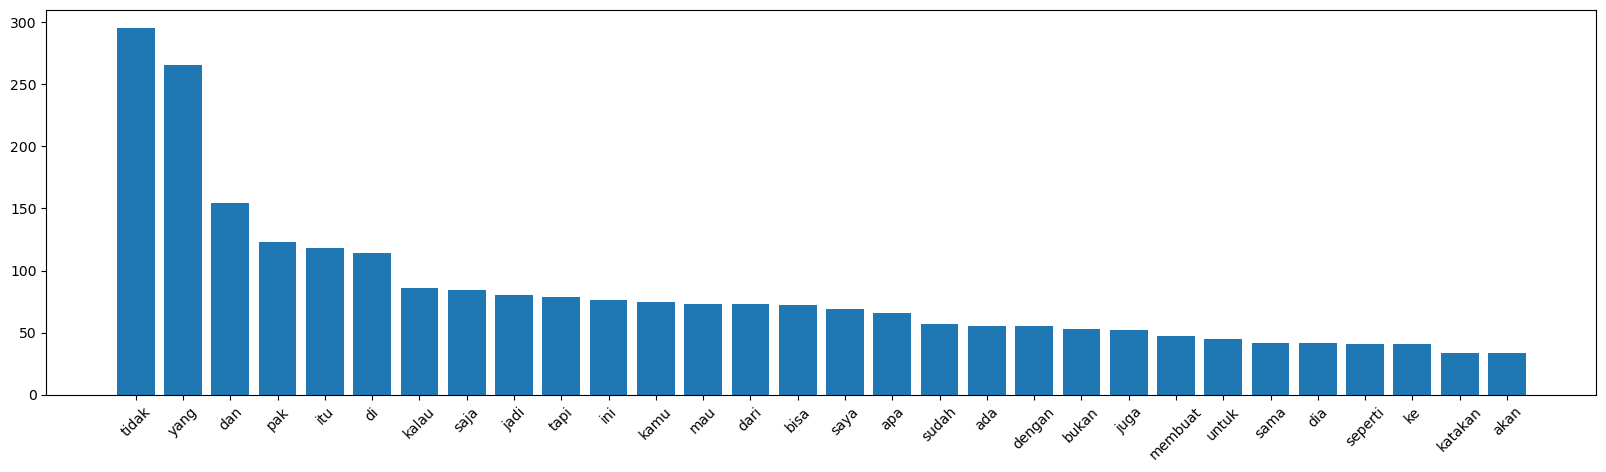

In [82]:
# Plot top stopwords

top=sorted(negative_dic.items(), key=lambda x:x[1],reverse=True)[:30]
x,y=zip(*top)
fig = plt.figure(figsize=(20, 5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

netral

In [83]:
# Create corpus
corpus=[]
new= df[df['sentimen'] == 'netral']['tweet_non_slang'].dropna().str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
neutral_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        neutral_dic[word]+=1

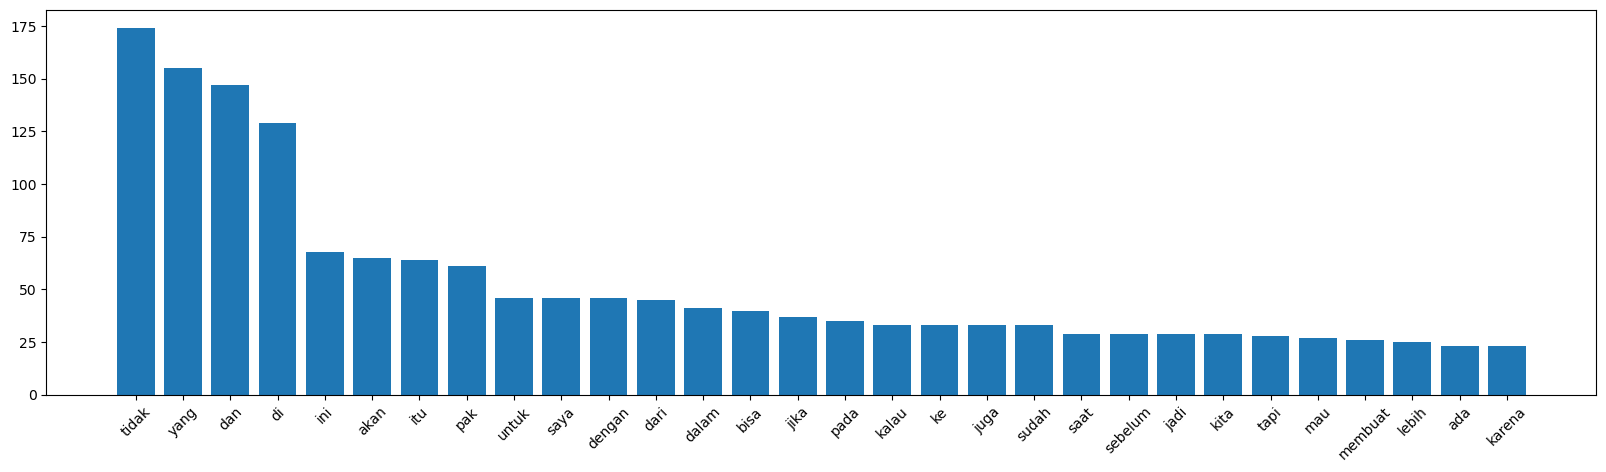

In [84]:
# Plot top stopwords

top=sorted(neutral_dic.items(), key=lambda x:x[1],reverse=True)[:30]
x,y=zip(*top)
fig = plt.figure(figsize=(20, 5))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Find stopwords that are more dominant for specific sentiment

In [49]:
positive_sw = [i[0] for i in sorted(positive_dic.items(), key=lambda x:x[1],reverse=True)][:30]
negative_sw = [i[0] for i in sorted(negative_dic.items(), key=lambda x:x[1],reverse=True)][:30]
neutral_sw = [i[0] for i in sorted(neutral_dic.items(), key=lambda x:x[1],reverse=True)][:30]

In [50]:
pos_list = []
for i in positive_sw:
  if i not in negative_sw:
    if  i not in neutral_sw:
      pos_list.append(i)
neg_list = []
for i in negative_sw:
  if i not in positive_sw:
    if  i not in neutral_sw:
      neg_list.append(i)
net_list = []
for i in neutral_sw:
  if i not in positive_sw:
    if  i not in negative_sw:
      net_list.append(i)

In [87]:
print("Stopwords that likely used on positive tweet:", ", ".join(pos_list))
print("Stopwords that likely used on negative tweet:",", ".join(neg_list))
print("Stopwords that likely used on neutral tweet:",", ".join(net_list))

Stopwords that likely used on positive tweet: mereka, kami, sangat
Stopwords that likely used on negative tweet: apa, sama, dia, seperti, katakan
Stopwords that likely used on neutral tweet: dalam, jika, pada, saat, sebelum


## Ngram analysis

Bigram

In [52]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.ap

<Axes: >

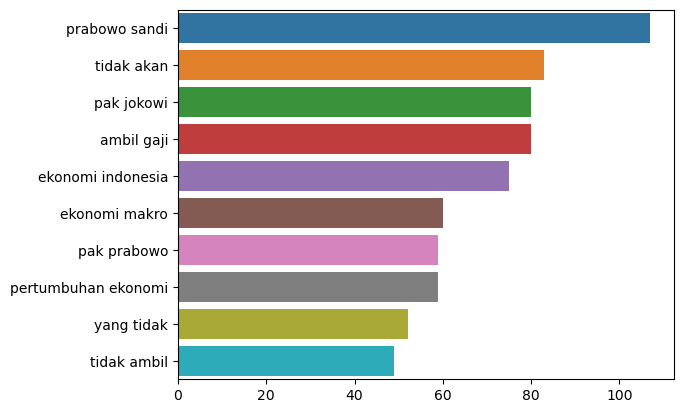

In [53]:
top_n_bigrams=get_top_ngram(df["tweet_non_slang"].dropna(),2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.ap

<Axes: >

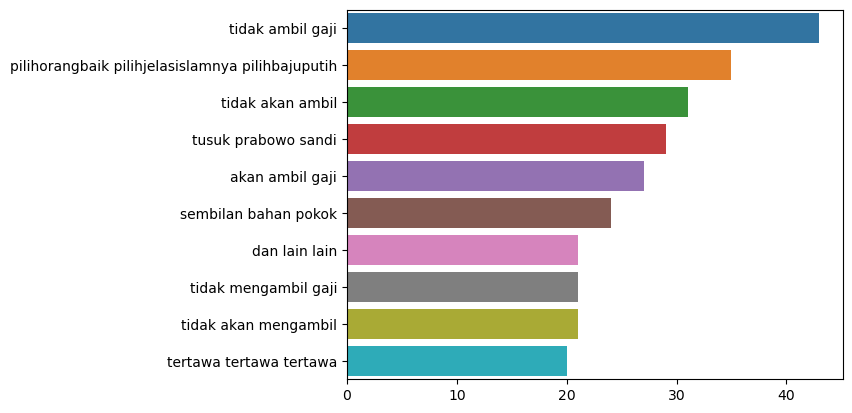

In [54]:
top_tri_grams=get_top_ngram(df["tweet_non_slang"].dropna(),n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x) 

## Wordcloud

All

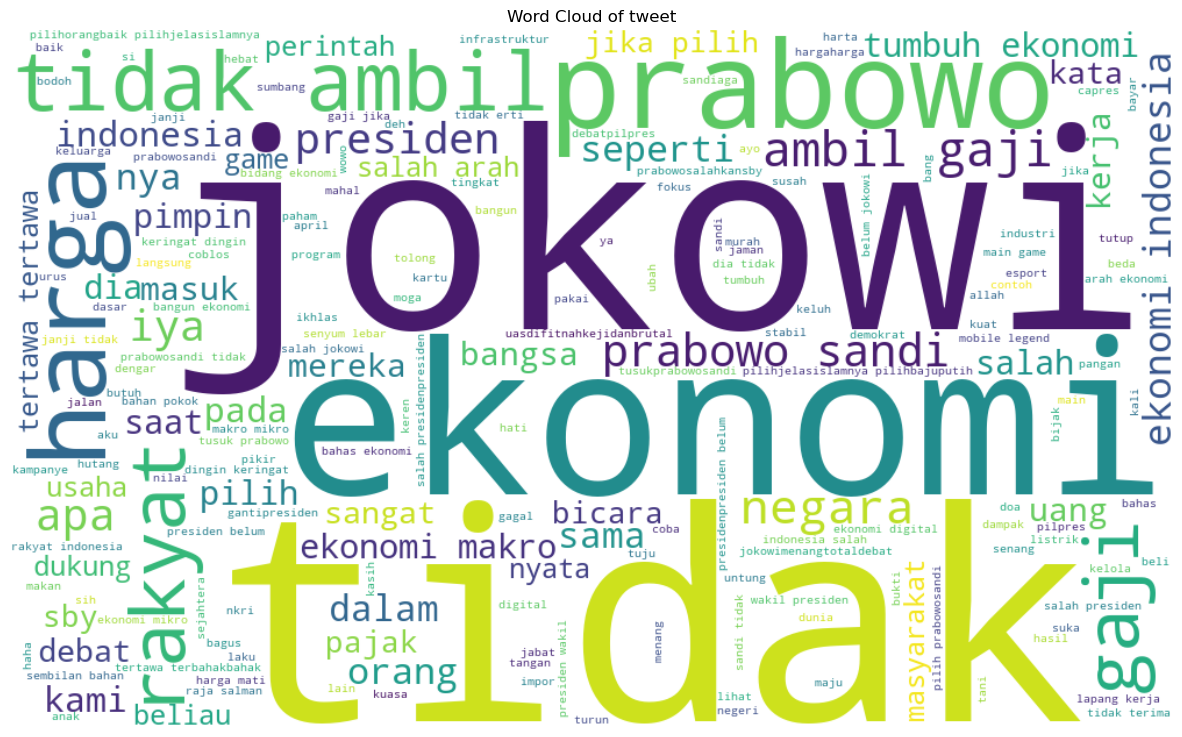

In [55]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df['tweet_stemming'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of tweet')
plt.axis('off')
plt.show()

In [56]:
# Split the words from the string and count their occurrences
word_counts = Counter(all_reviews.split())

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Display the top 20 most common words
print("Top 20 most common words:")
for word, count in top_20_words:
    print(f"{word}: {count}")

Top 20 most common words:
ekonomi: 711
tidak: 706
jokowi: 449
prabowo: 417
gaji: 365
harga: 271
salah: 238
presiden: 231
indonesia: 214
sandi: 191
ambil: 189
rakyat: 161
pilih: 138
negara: 132
apa: 119
iya: 117
tertawa: 115
kerja: 98
dalam: 97
sama: 97


positif

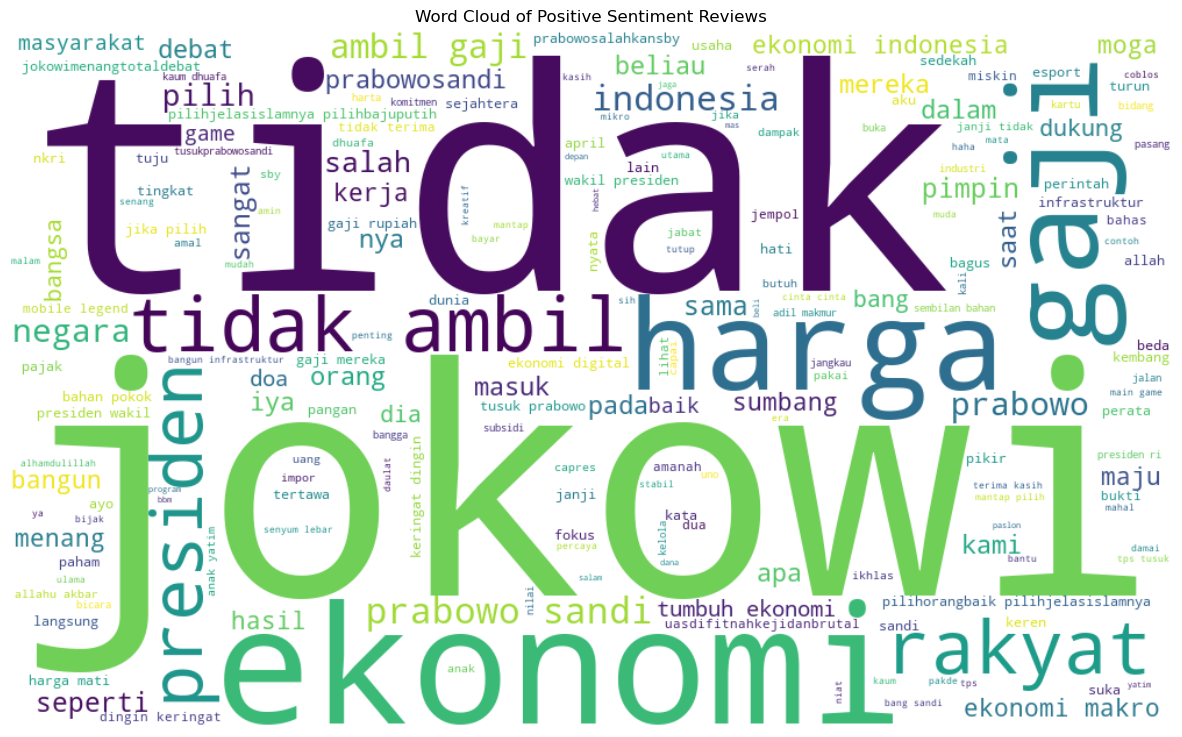

In [57]:
# Filter reviews with 'Positive' sentiment
positive_reviews = ' '.join(df[df['sentimen'] == 'positif']['tweet_stemming'].dropna())

# Generate the word cloud
wordcloud_positive = WordCloud(width=1000, height=600, background_color='white').generate(positive_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiment Reviews')
plt.axis('off')
plt.show()

In [58]:
# Split the words from the string and count their occurrences
positive_word_counts = Counter(positive_reviews.split())

# Get the top 20 most common words in neutral reviews
top_20_positive_words = positive_word_counts.most_common(20)

# Display the top 20 most common words in neutral reviews
print("Top 20 most common words in positive reviews:")
for word, count in top_20_positive_words:
    print(f"{word}: {count}")

Top 20 most common words in positive reviews:
tidak: 234
ekonomi: 201
gaji: 156
jokowi: 152
prabowo: 132
harga: 100
presiden: 99
ambil: 84
sandi: 82
indonesia: 80
rakyat: 68
pilih: 68
salah: 59
negara: 52
mereka: 40
kami: 40
sangat: 37
dalam: 36
sama: 36
iya: 36


negatif

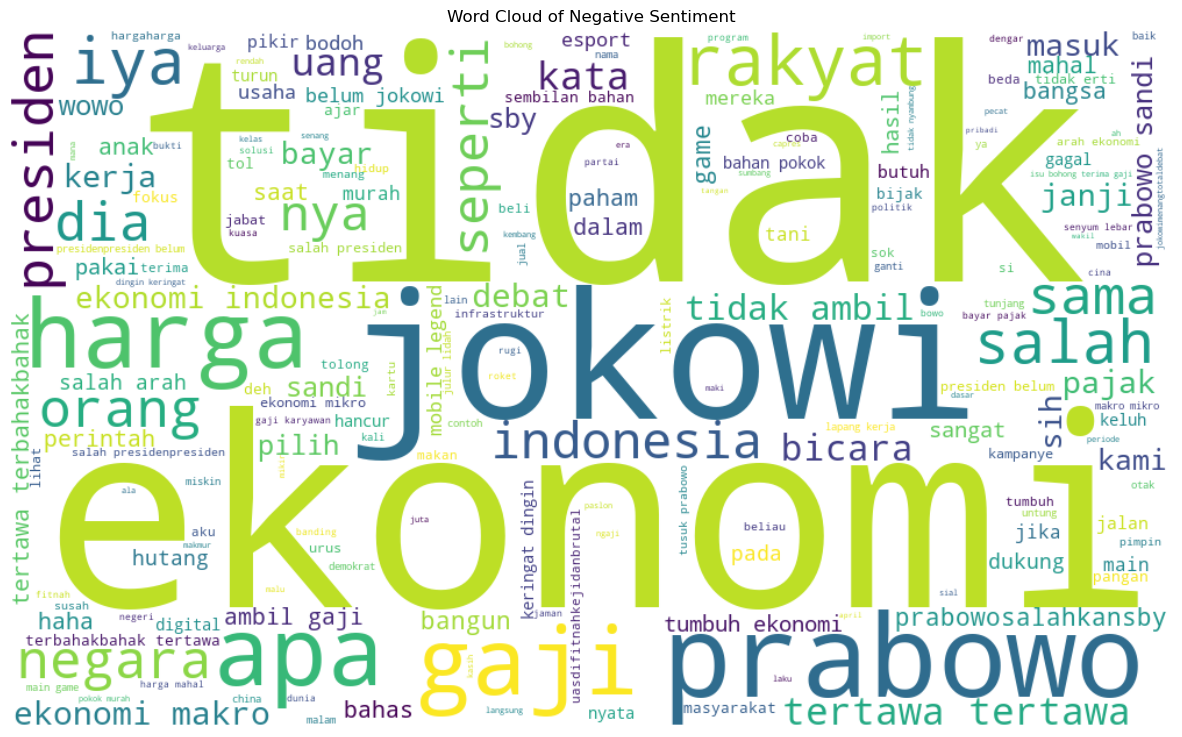

In [59]:
# Filter reviews with 'Negative' sentiment
negative_reviews = ' '.join(df[df['sentimen'] == 'negatif']['tweet_stemming'].dropna())

# Generate the word cloud
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white').generate(negative_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiment')
plt.axis('off')
plt.show()

In [60]:
# Split the words from the string and count their occurrences
negative_word_counts = Counter(negative_reviews.split())

# Get the top 20 most common words in negative reviews
top_20_negative_words = negative_word_counts.most_common(20)

# Display the top 20 most common words in negative reviews
print("Top 20 most common words in negative tweet:")
for word, count in top_20_negative_words:
    print(f"{word}: {count}")

Top 20 most common words in negative tweet:
tidak: 298
ekonomi: 250
prabowo: 140
jokowi: 137
gaji: 101
salah: 92
tertawa: 89
harga: 80
apa: 70
rakyat: 67
presiden: 65
indonesia: 64
iya: 58
sandi: 50
sama: 43
orang: 42
dia: 42
negara: 42
seperti: 41
ambil: 41


netral

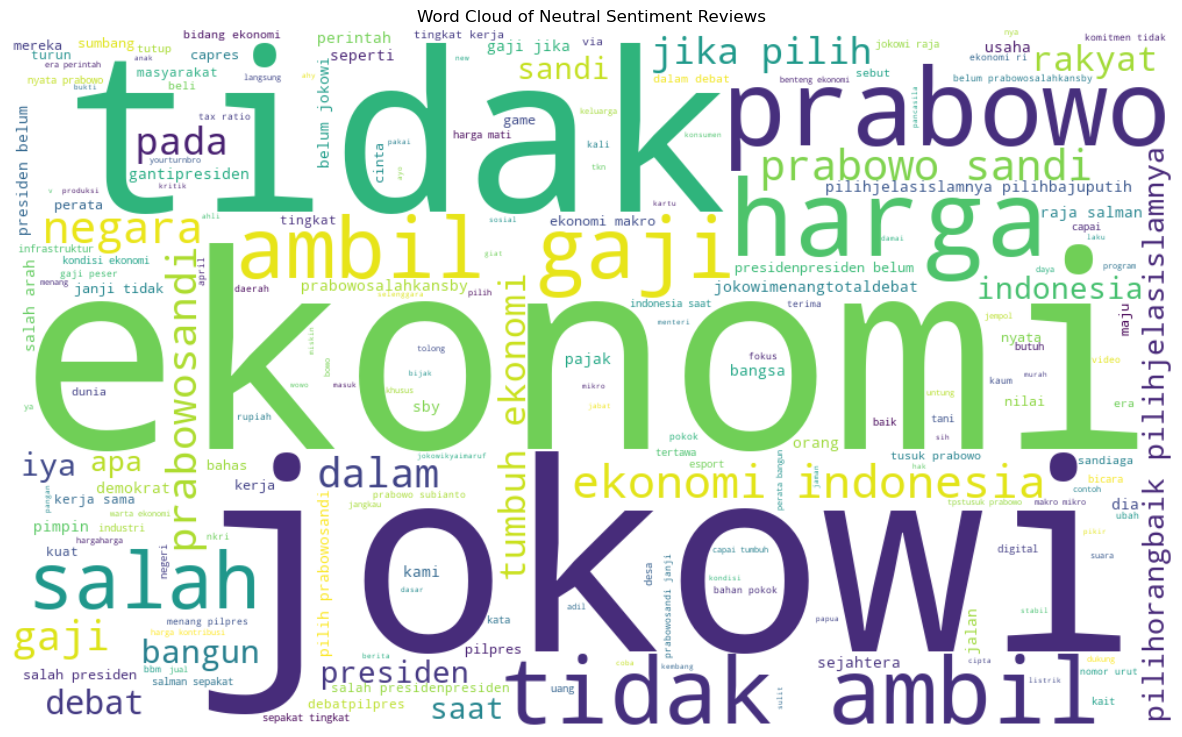

In [61]:
# Filter reviews with 'Neutral' sentiment
neutral_reviews = ' '.join(df[df['sentimen'] == 'netral']['tweet_stemming'].dropna())

# Generate the word cloud
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white').generate(neutral_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud of Neutral Sentiment Reviews')
plt.axis('off')
plt.show()

In [62]:
# Split the words from the string and count their occurrences
neutral_word_counts = Counter(neutral_reviews.split())

# Get the top 20 most common words in neutral reviews
top_20_neutral_words = neutral_word_counts.most_common(20)

# Display the top 20 most common words in neutral reviews
print("Top 20 most common words in neutral reviews:")
for word, count in top_20_neutral_words:
    print(f"{word}: {count}")

Top 20 most common words in neutral reviews:
ekonomi: 260
tidak: 174
jokowi: 160
prabowo: 145
gaji: 108
harga: 91
salah: 87
indonesia: 70
presiden: 67
ambil: 64
sandi: 59
prabowosandi: 54
pilih: 47
dalam: 42
debat: 39
negara: 38
jika: 37
tumbuh: 36
kerja: 35
pada: 35


## Topic Modelling

In [88]:
def get_lda_objects(text):
    nltk.download('stopwords')

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)
    print("finish preprocess")
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 3)

    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [89]:
lda_model, bow_corpus, dic = get_lda_objects(df["tweet_stemming"].dropna())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


finish preprocess


In [90]:
lda_model.show_topics()

[(0,
  '0.028*"ekonomi" + 0.026*"harga" + 0.022*"jokowi" + 0.016*"prabowo" + 0.008*"presiden" + 0.008*"rakyat" + 0.007*"murah" + 0.007*"bangun" + 0.007*"iya" + 0.006*"mahal"'),
 (1,
  '0.049*"ekonomi" + 0.034*"jokowi" + 0.016*"tertawa" + 0.012*"prabowo" + 0.012*"indonesia" + 0.012*"harga" + 0.011*"presiden" + 0.008*"tumbuh" + 0.008*"iya" + 0.007*"kerja"'),
 (2,
  '0.032*"ekonomi" + 0.015*"harga" + 0.013*"salah" + 0.012*"indonesia" + 0.010*"rakyat" + 0.010*"jokowi" + 0.008*"pajak" + 0.007*"prabowo" + 0.006*"senyum" + 0.005*"arah"'),
 (3,
  '0.040*"gaji" + 0.032*"prabowo" + 0.024*"ekonomi" + 0.023*"ambil" + 0.018*"salah" + 0.018*"sandi" + 0.015*"jokowi" + 0.015*"presiden" + 0.013*"pilih" + 0.010*"negara"')]

In [91]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.131752  0.017687       1        1  38.357407
1     -0.017368 -0.106043       2        1  30.242915
0     -0.075678  0.020343       3        1  17.280860
2     -0.038706  0.068014       4        1  14.118818, topic_info=             Term        Freq       Total Category  logprob  loglift
34           gaji  308.000000  308.000000  Default  30.0000  30.0000
112         ambil  161.000000  161.000000  Default  29.0000  29.0000
66          harga  216.000000  216.000000  Default  28.0000  28.0000
295       tertawa   94.000000   94.000000  Default  27.0000  27.0000
18        ekonomi  577.000000  577.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
71         negara   10.060178  109.948044   Topic4  -5.4939  -0.4338
199         bayar    7.438711   36.317224   Topic4  -5.7958   0.3721
116  prabowosandi    8.540396   71.444815   Topic4  -5.6577  -0.1665
58           uang    7.615592   43.634041   Topic4  -5.7723   0.2120
34           gaji    8.717214  308.517892   Topic4  -5.6372  -1.6088

[299 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
130       2  0.915345  akibat
534       2  0.951151    alam
1053      1  0.842587   allah
1053      2  0.124828   allah
1053      4  0.031207   allah
...     ...       ...     ...
2245      2  0.734796  widodo
1780      3  0.844397  winter
135       2  0.584219    wowo
135       4  0.401651    wowo
39        1  0.952864   yatim

[491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])